In [2]:
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import math

def plot_tensorboard_scalar_grid(writer_path, grids):
    # Load the event files
    ea = event_accumulator.EventAccumulator(writer_path)
    ea.Reload()

    available_tags = ea.Tags()['scalars']
    print("Available scalar tags:", available_tags)

    n_plots = len(grids)
    n_cols = 2
    n_rows = math.ceil(n_plots / n_cols)

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3.5 * n_rows), squeeze=False)

    for idx, tag_group in enumerate(grids):
        row = idx // n_cols
        col = idx % n_cols
        ax = axs[row][col]

        found_any = False
        for tag in tag_group:
            if tag not in available_tags:
                print(f"[!] Tag '{tag}' not found. Skipping.")
                continue

            events = ea.Scalars(tag)
            steps = [e.step for e in events]
            values = [e.value for e in events]
            ax.plot(steps, values, label=tag)
            found_any = True

        if found_any:
            ax.set_title(" | ".join(tag_group))
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Value')
            ax.legend()
            ax.grid(True)
        else:
            ax.set_title("No valid tags in this group.")
            ax.axis('off')

    # Turn off unused axes
    total_axes = n_rows * n_cols
    for i in range(n_plots, total_axes):
        row = i // n_cols
        col = i % n_cols
        axs[row][col].axis('off')

    plt.tight_layout()
    plt.show()


Available scalar tags: ['running train/loss', 'running train/1st step mae', 'running train/mae', 'running train/steer loss', 'running train/accel loss', 'epoch training/loss', 'epoch training/1st step mae', 'epoch training/mae', 'epoch training/steer loss', 'epoch training/accel loss', 'running val/loss', 'running val/1st step mae', 'running val/mae', 'running val/steer loss', 'running val/accel loss', 'epoch validation/loss', 'epoch validation/1st step mae', 'epoch validation/mae', 'epoch validation/steer loss', 'epoch validation/accel loss']
[!] Tag 'epoch training loss' not found. Skipping.
[!] Tag 'epoch validation loss' not found. Skipping.
[!] Tag 'epoch segmentation loss' not found. Skipping.
[!] Tag 'epoch segmentation acc' not found. Skipping.
[!] Tag 'epoch intersection loss' not found. Skipping.
[!] Tag 'epoch road edge loss' not found. Skipping.
[!] Tag 'epoch traffic light loss' not found. Skipping.


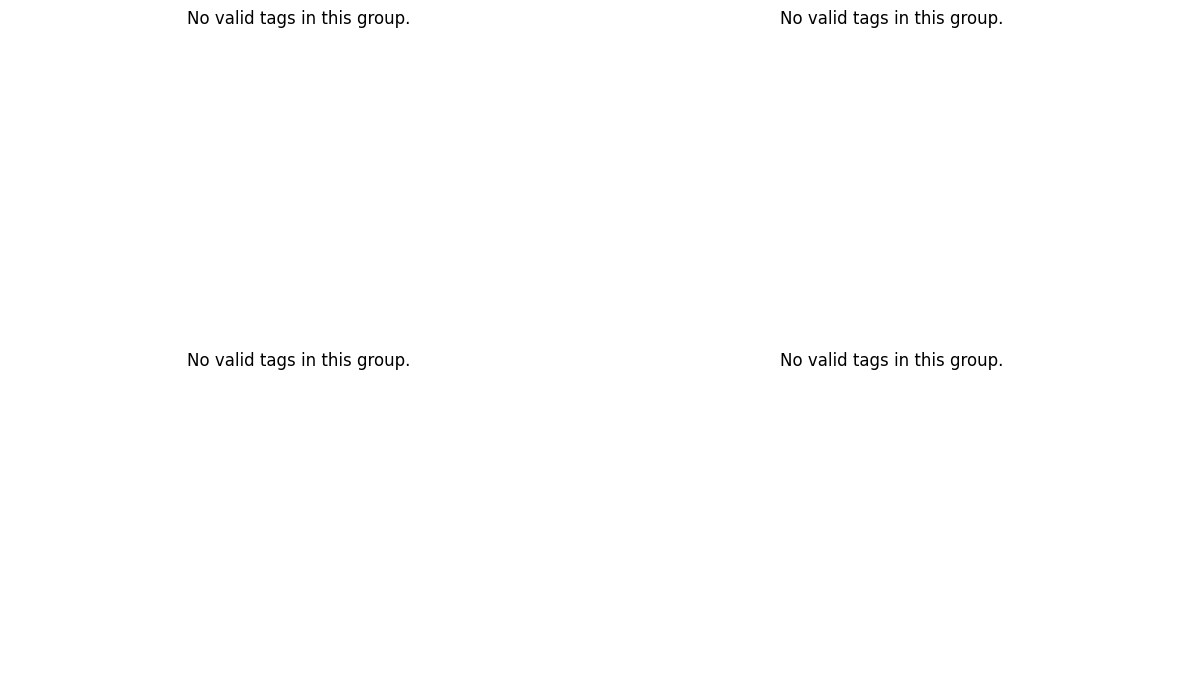

In [3]:
writer_path = "runs/CILv3D_sim2real_artifacts_val"
grids = [
    ['epoch training loss', 'epoch validation loss'],
    ['epoch segmentation loss', 'epoch segmentation acc'],
    ['epoch intersection loss'],
    ['epoch road edge loss', 'epoch traffic light loss']
]

plot_tensorboard_scalar_grid(writer_path, grids)

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

def plot_tensorboard_scalars(writer_path, tags=['loss', 'val_loss']):
    # Load the event files
    ea = event_accumulator.EventAccumulator(writer_path)
    ea.Reload()

    available_tags = ea.Tags()['scalars']
    print("Available scalar tags:", available_tags)

    plt.figure(figsize=(10, 6))

    for tag in tags:
        if tag not in available_tags:
            print(f"⚠️  Tag '{tag}' not found. Skipping.")
            continue

        events = ea.Scalars(tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        plt.plot(steps, values, label=tag)

    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title(f'TensorBoard Scalars: {", ".join(tags)}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
writer_path = "runs/Jul09_10-15-00_my_model"  # Update with your actual path
plot_tensorboard_scalars(writer_path, tags=['loss', 'val_loss', 'accuracy'])


In [ ]:
from tensorboard.backend.event_processing import event_accumulator

def print_min_scalar_values(writer_path, tags=['loss', 'val_loss']):
    # Load the event files
    ea = event_accumulator.EventAccumulator(writer_path)
    ea.Reload()

    available_tags = ea.Tags()['scalars']
    print("Available scalar tags:", available_tags)
    print("\n🔍 Minimum scalar values:")

    for tag in tags:
        if tag not in available_tags:
            print(f"⚠️  Tag '{tag}' not found. Skipping.")
            continue

        events = ea.Scalars(tag)
        min_event = min(events, key=lambda e: e.value)
        print(f"• {tag}: min = {min_event.value:.4f} at step {min_event.step}")
